# Sequential SAR Change Detection

In [1]:
from auxil.eeSar_seq import run
run()

TWFwKGJhc2VtYXA9eyd1cmwnOiAnaHR0cHM6Ly97c30udGlsZS5vcGVuc3RyZWV0bWFwLm9yZy97en0ve3h9L3t5fS5wbmcnLCAnbWF4X3pvb20nOiAxOSwgJ2F0dHJpYnV0aW9uJzogJ01hcCDigKY=


VkJveChjaGlsZHJlbj0oVGV4dGFyZWEodmFsdWU9dSdBbGdvcml0aG0gb3V0cHV0JywgbGF5b3V0PUxheW91dCh3aWR0aD11JzEwMCUnKSwgcm93cz00KSwgSEJveChjaGlsZHJlbj0oVGV4dCjigKY=


# How to use the interface

#### To generate change maps:

    - select the desired time interval
    - use the Polygon tool to select an ROI (default: the town of Jülich, Germany and surroundings)
    - leave the relative orbit value at 0
    - choose orbit pass (ascending or descending), platform (S1a, S1b or both)
    - choose change map type for previewing (color-coded time of first change, last change or change frequency)
    - set a desired opacity for the preview overlay
    - leave the significance level at its default value
    - press Run to accumulate the images
Information about the images found is shown in the output window and a composite of the mean of all of the images is overlayed onto the map. If more than one relative orbit number is present, you can choose one of them by entering its value into the mask. For change detection, it is advisable not to use more than one orbit. 

    - press Run again if desired
    - press Preview to see a preview overlay of the chosen change map 
Depending on the size of the images and their number, this can take up to a few minutes. The overlay is built up tile-by-tile as the GEE servers complete their tasks. Changing the zoom level will trigger a re-calculation of the preview overlay, again with a time delay. The preview maps are only indicative, since they are re-calculated for each chosen zoom level. The zoom level determines the scale of calculation and hence the ENL (Equivalent Number of Looks). The correct ENL value (4.4) applies to the export task (see below) which is at the nominal scale of 10m per pixel. Selecting a different change map or opacity does not require a new Run: the Preview button remains activated. Optionally use the URL displayed in the output window to download the change maps. This may fail for longer time series and generate a corrupted ZIP file. Export to assests is reliable. When satisfied, enter username/path in the Export to assets mask.
    
    - Press Export to assets to start an Export task on the GEE servers
An additional metadata file in CSV format is exported to the Google Drive for each asset export.    

#### File structure

The exported or downloaded per-pixel change maps for a time sequence of length k are combined into a single file in GeoTiff format:

    band 1 cmap: Period in which most recent significant change occured (integer 1 ... k-1)
    band 2 smap: Period in which the first significant change occurred (integer 1 ... k-1)
    bans 3 fmap: Number of significant changes (integer 1 ... k-1)
    bands 4 ... k+3: Changes in each interval (1=positive definite, 2=negative definite, 3=indefinite)
    band k+4: Sentinel 2 background image (band B8) if available, otherwise averaged VV band of the s1 series
    
#### Fine adjustments

    - select a different significance level
The significance level applies to the tests performed in each change interval. Since they are statistically independent for no-change observations, the false positive rate will accumulate until the next change is registered. For example, for significance 0.0001 and a sequence of 20 images, for pixels  which do not change over the entire observation period, the probability of a false positive in the first interval is 0.0001, within the first two intervals 1-(1-0.0001)² = 0.0019 and over the entire image sequence 1-(1-0.0001)^19 = 0.019.

    - select Q test
Select this box to ensure that the overall test for a change at the chosen significance (omnibus test) is carried out for the entire sequence (and for each subsequence following the first signaled change) before the individual intervals are tested. This guarantees the same false positive rate for any subsequence of no-change observations, but will also cause a loss in detection sensitivity for true change (larger false negative rate).

    -select 3x3 median filter
The p-values used in the tests are filtered before testing. This has the effect of supressing single-pixel changes (salt-and-pepper effect).  

#### Limits

The ROI should be completely enclosed within the S1 full scenes involved in the calculation. The larger the ROI and the more detailed the zoom level, the longer the preview calculation. (The export task is not affected by the zoom level). By experience, time series longer than about 60 will cause a GEE server internal error (due to stack overflow caused by the depth of iteration).

__Reference:__ Knut Conradsen, Allan Aasbjerg Nielsen and Henning Skriver (2016). Determining the points of change in time series of polarimetric SAR data. IEEE Transactions on Geoscience and Remote Sensing 54(5), 3007-3024

http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6825



In [3]:
ls imagery/series_6x2_BL_PM/

change_bmap.tif                     S1_20180623_6x2_BL_PM_sub_warp.tif
change_cmap.tif                     S1_20180705_6x2_BL_PM_sub.tif
change_fmap.tif                     S1_20180705_6x2_BL_PM_sub_warp.tif
change_smap.tif                     S1_20180717_6x2_BL_PM_sub.tif
S1_20180412_6x2_BL_PM_sub_sub.tif   S1_20180717_6x2_BL_PM_sub_warp.tif
S1_20180412_6x2_BL_PM_sub.tif       S1_20180729_6x2_BL_PM_sub.tif
S1_20180424_6x2_BL_PM_sub.tif       S1_20180729_6x2_BL_PM_sub_warp.tif
S1_20180424_6x2_BL_PM_sub_warp.tif  S1_20180810_6x2_BL_PM_sub.tif
S1_20180506_6x2_BL_PM_sub.tif       S1_20180810_6x2_BL_PM_sub_warp.tif
S1_20180506_6x2_BL_PM_sub_warp.tif  S1_20180822_6x2_BL_PM_sub.tif
S1_20180518_6x2_BL_PM_sub.tif       S1_20180822_6x2_BL_PM_sub_warp.tif
S1_20180518_6x2_BL_PM_sub_warp.tif  S1_20180903_6x2_BL_PM_sub.tif
S1_20180530_6x2_BL_PM_sub.tif       S1_20180903_6x2_BL_PM_sub_warp.tif
S1_20180530_6x2_BL_PM_sub_warp.tif  S1_20180915_6x2_BL_PM_sub.tif
S1_20180611_6x2_BL_PM_sub.tif       S1_20

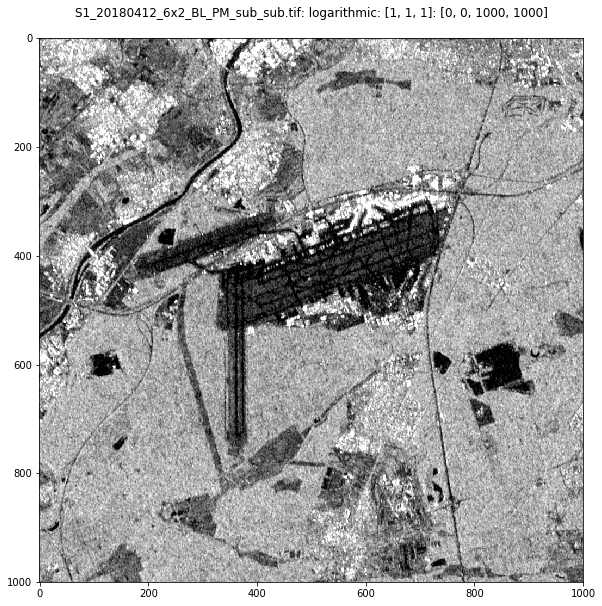

In [8]:
%run scripts/dispms -f imagery/series_6x2_BL_PM/S1_20180412_6x2_BL_PM_sub_sub.tif 

     ENL Estimation
Thu Jun 13 16:20:34 2019
infile:  imagery/series_6x2_BL_PM/S1_20180412_6x2_BL_PM_sub_sub.tif
Dual polarimetry
filtering...
row:  100  200  300 

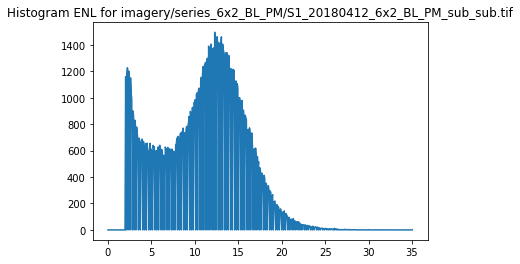

 ENL image written to: imagery/series_6x2_BL_PM/S1_20180412_6x2_BL_PM_sub_sub_enl.tif
elapsed time: 13.0031468868


In [11]:
%run scripts/enlml -d [500,100,400,400] imagery/series_6x2_BL_PM/S1_20180412_6x2_BL_PM_sub_sub.tif